In [267]:
# A machine learning library used for linear regression
from sklearn.linear_model import LinearRegression
# numpy and pandas will be used for data manipulation
import numpy as np
import pandas as pd
# matplotlib will be used for visually representing our data
import matplotlib.pyplot as plt
# Quandl will be used for importing historical oil prices
import quandl

In [245]:
# Setting our API key
quandl.ApiConfig.api_key = <Your API key>

# Importing our data
data = quandl.get("FRED/DCOILBRENTEU", start_date="1987-05-20", end_date="2020-01-01")
data.head()

,Value
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


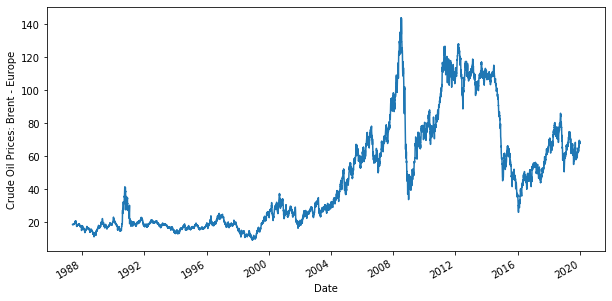

In [246]:
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices: Brent - Europe")

# Setting the size of our graph
data.Value.plot(figsize=(10,5))

In [261]:
data['MA3'] = data['Value'].shift(1).rolling(window=1).mean()
data['MA9']= data['Value'].shift(1).rolling(window=2).mean()

# Dropping the NaN values
data = data.dropna()

# Initialising X and assigning the two feature variables
X = data[['MA3','MA9']]

# Getting the head of the data
X.head()

,MA3,MA9
Date,,
1987-07-17,20.40,20.340
1987-07-20,20.63,20.515
1987-07-21,20.55,20.590
1987-07-22,20.35,20.450
1987-07-23,20.33,20.340


In [262]:
# Setting-up the dependent variable
y = data['Value']

# Getting the head of the data
y.head()

Date
1987-07-17    20.63
1987-07-20    20.55
1987-07-21    20.35
1987-07-22    20.33
1987-07-23    20.15
Name: Value, dtype: float64

In [263]:
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [264]:
# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)

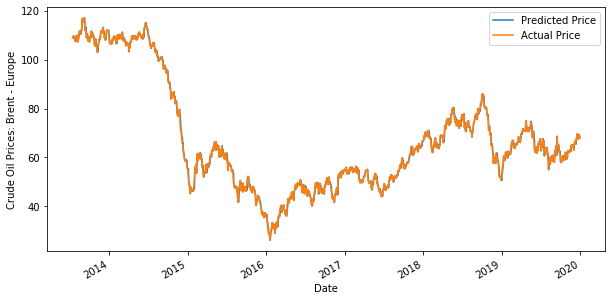

In [265]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - Europe")
plt.show()

In [266]:
R_squared_score = linear.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.72% accuracy.
